In [1]:
import numpy as np
import pylab as plt
#Project goal
#build a reinforcement model to train a model to walk on the street
#people will be walking on the sidewalk
#there is cars on the street
#the agent must go to   the sidewalk


In [2]:
points_list = [(0,2), (1,5), (6,7), (2,4), (1,2), (1,3), (5,7)] #map points 

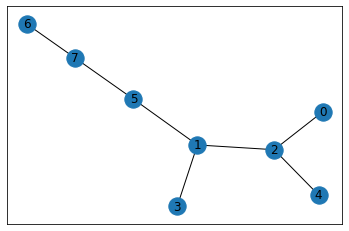

In [7]:
goal =5 # the goal distnation 
#using networkx to draw the graph
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [8]:
MATRIX_SIZE = 8

In [9]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [10]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
    R[goal,goal]= 100


(0, 2)
(1, 5)
(6, 7)
(2, 4)
(1, 2)
(1, 3)
(5, 7)


In [11]:
R

matrix([[ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,   0.,  -1., 100.,  -1.,  -1.],
        [  0.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1., 100.,  -1.,   0.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.],
        [ -1.,  -1.,  -1.,  -1.,  -1., 100.,   0.,  -1.]])

In [12]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1


In [13]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)




max_value 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 80.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 180.0
Score: 200.0
max_value 144.0
Score: 235.55555555555554
max_value 215.2
Score: 250.55762081784388
max_value 0.0
Score: 250.55762081784388
max_value 144.0
Score: 317.47211895910783
max_value 115.2
Score: 371.003717472119
max_value 0.0
Score: 371.003717472119
max_value 115.2
Score: 371.003717472119
max_value 115.2
Score: 371.003717472119
max_value 115.2
Score: 424.5353159851302
max_value 0.0
Score: 424.5353159851302
max_value 0.0
Score: 424.5353159851302
max_value 115.2
Score: 424.5353159851302
max_value 0.0
Score: 424.5353159851302
max_value 0.0
Score: 424.5353159851302
max_value 92.16000000000001
Score: 467.3605947955391
max_value 115.2
Score: 467.3605947955391
max_value 144.0
Score: 467.3605947955391
max_value 115.2
Score: 467.360594795539

Score: 1117.6816027392208
max_value 369.4198328524801
Score: 1117.6816027392208
max_value 461.7747910656001
Score: 1119.7510752220187
max_value 369.4198328524801
Score: 1119.7510752220187
max_value 295.5358662819841
Score: 1121.0755376110094
max_value 369.4198328524801
Score: 1121.0755376110094
max_value 295.5358662819841
Score: 1121.0755376110094
max_value 295.5358662819841
Score: 1121.0755376110094
max_value 295.5358662819841
Score: 1122.4
max_value 295.5358662819841
Score: 1122.4
max_value 469.4198328524801
Score: 1105.7490402921208
max_value 375.5358662819841
Score: 1107.0519322880423
max_value 236.4286930255873
Score: 1107.0519322880423
max_value 369.4198328524801
Score: 1107.0519322880423
max_value 375.5358662819841
Score: 1107.0519322880423
max_value 369.4198328524801
Score: 1107.0519322880423
max_value 295.5358662819841
Score: 1107.0519322880423
max_value 295.5358662819841
Score: 1107.0519322880423
max_value 295.5358662819841
Score: 1107.0519322880423
max_value 369.419832852480

max_value 395.89559944359974
Score: 1114.983045966708
max_value 313.58687413062455
Score: 1114.983045966708
max_value 395.89559944359974
Score: 1115.7735587758057
max_value 494.86949930449964
Score: 1115.7735587758057
max_value 395.89559944359974
Score: 1115.7735587758057
max_value 316.7164795548798
Score: 1116.4059690230838
max_value 395.89559944359974
Score: 1116.4059690230838
max_value 313.58687413062455
Score: 1116.4059690230838
max_value 394.86949930449964
Score: 1116.4059690230838
max_value 394.86949930449964
Score: 1116.4059690230838
max_value 494.86949930449964
Score: 1116.4059690230838
max_value 394.86949930449964
Score: 1116.4059690230838
max_value 250.86949930449964
Score: 1116.4059690230838
max_value 250.86949930449964
Score: 1116.4059690230838
max_value 494.86949930449964
Score: 1116.6651535506567
max_value 313.58687413062455
Score: 1116.6651535506567
max_value 316.7164795548798
Score: 1116.6651535506567
max_value 494.86949930449964
Score: 1116.9243380782295
max_value 313.

Most efficient path:
[0, 2, 5, 7]


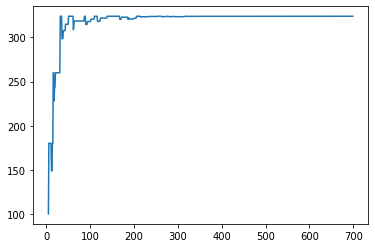

In [36]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
                                == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index =int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

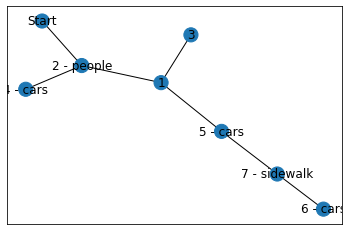

In [17]:
people = [2]
cars = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - people', 3:'3',
    4:'4 - cars', 5:'5 - cars', 6:'6 - cars', 7:'7 - sidewalk'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [32]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_people = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_cars = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [33]:
def collect_environmental_data(action):
    found = []
    if action in people:
        found.append('p')

    if action in cars:
        found.append('c')
    return (found)

available_act = available_actions(initial_state)

action = sample_next_action(available_act)

In [34]:

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  environment = collect_environmental_data(action)
  if 'p' in environment:
    enviro_people[current_state, action] += 1

  if 'c' in environment:
    enviro_cars[current_state, action] += 1

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('People Found')
print(enviro_people)
print('Cars Found')
print(enviro_cars)

max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 100.0
max_value 80.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 64.0
max_value 180.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 115.2
max_value 0.0
max_value 0.0
max_value 244.0
max_value 195.20000000000002
max_value 195.20000000000002
max_value 0.0
max_value 0.0
max_value 156.16000000000003
max_value 244.0
max_value 0.0
max_value 0.0
max_value 156.16000000000003
max_value 0.0
max_value 295.20000000000005
max_value 0.0
max_value 0.0
max_value 0.0
max_value 195.20000000000002
max_value 0.0
max_value 0.0
max_value 336.1600000000001
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 195.200

max_value 394.23539247696584
max_value 395.3883139815727
max_value 315.3883139815727
max_value 395.3883139815727
max_value 394.23539247696584
max_value 394.23539247696584
max_value 394.23539247696584
max_value 394.23539247696584
max_value 394.23539247696584
max_value 394.23539247696584
max_value 394.23539247696584
max_value 494.23539247696584
max_value 395.3883139815727
max_value 395.3883139815727
max_value 394.23539247696584
max_value 315.3883139815727
max_value 315.3883139815727
max_value 315.3883139815727
max_value 316.31065118525817
max_value 494.23539247696584
max_value 494.23539247696584
max_value 494.23539247696584
max_value 494.23539247696584
max_value 316.31065118525817
max_value 395.3883139815727
max_value 395.3883139815727
max_value 252.31065118525817
max_value 315.3883139815727
max_value 315.3883139815727
max_value 395.3883139815727
max_value 252.31065118525817
max_value 252.31065118525817
max_value 395.3883139815727
max_value 395.3883139815727
max_value 315.3883139815727
m

max_value 318.48884272548185
max_value 398.7910741803855
max_value 319.03285934430846
max_value 318.48884272548185
max_value 318.48884272548185
max_value 318.7910741803855
max_value 498.48884272548185
max_value 318.48884272548185
max_value 319.03285934430846
max_value 398.7910741803855
max_value 319.03285934430846
max_value 254.7910741803855
max_value 318.48884272548185
max_value 319.03285934430846
max_value 398.7910741803855
max_value 318.48884272548185
max_value 498.48884272548185
max_value 498.7910741803855
max_value 398.48884272548185
max_value 398.7910741803855
max_value 318.48884272548185
max_value 398.7910741803855
max_value 318.48884272548185
max_value 398.48884272548185
max_value 318.7910741803855
max_value 398.7910741803855
max_value 398.48884272548185
max_value 398.7910741803855
max_value 318.7910741803855
People Found
[[  0.   0. 105.   0.   0.   0.   0.   0.]
 [  0.   0.  30.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   

max_value 0.0
max_value 0.0
Score: nan
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
going from: [1 5 7]
to: [1 7]
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 164.0
Score: 148.78048780487805
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 148.78048780487805
going from: [1 5 7]
to: [1 7]
max_value 131.20000000000002
Score: 180.0
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 180.0
max_value 131.20000000000002
Score: 260.0
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: 260.0
max_value 204.96000000000004
Score: 228.02498048399687
going from: [1 5 7]
to: [1 7]
max_value 163.96800000000005
Score: 244.01249024199842
max_value 0.0
Score: 244.01249024199842
max_value 163.96800000000005


C:\Users\un_cs\anaconda3o\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


 0.0
Score: 324.0
max_value 212.44878553088006
Score: 324.0
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 324.0
going from: [1 5 7]
to: [1 7]
max_value 212.44878553088006
Score: 324.0
max_value 0.0
Score: 324.0
max_value 212.44878553088006
Score: 324.0
going from: [1 5 7]
to: [1 7]
max_value 212.44878553088006
Score: 324.0
going from: [1 5 7]
to: [1 7]
max_value 212.44878553088006
Score: 324.0
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 324.0
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
going from: [1 5 7]
to: [1 7]
max_value 212.44878553088006
Score: 324.0
max_value 169.95902842470406
Score: 324.0
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: 324.0
max_value 212.44878553088006
Score: 324.0
max_value 212.44878553088006
Score: 324.0
max_value 0.0
Score: 324.0
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 324.0
max_value 269.95902842470406
Score: 320.350696532596
max_value 169.95902842470406
Score: 320.350696532596
max_value 0.

max_value 221.94712443571444
Score: 323.89960257082043
max_value 221.94712443571444
Score: 323.89960257082043
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: 323.89960257082043
max_value 0.0
Score: 323.89960257082043
going from: [1 5 7]
to: [1 7]
max_value 221.94712443571444
Score: 323.95537892036464
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 323.95537892036464
max_value 221.94712443571444
Score: 323.95537892036464
max_value 0.0
Score: 323.95537892036464
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.95537892036464
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.95537892036464
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.95537892036464
max_value 0.0
Score: 323.95537892036464
going from: [1 5 7]
to: [1 7]
max_value 221.94712443571444
Score: 323.95537892036464
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.95537892036464
max_value 0.0
Score: 323.95537892036464
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 323.95537892036464
max_value 0.0
S

max_value 0.0
Score: 323.9892801935017
max_value 0.0
Score: 323.9892801935017
max_value 277.7541470578528
Score: 323.9892801935017
max_value 0.0
Score: 323.9892801935017
max_value 222.20331764628224
Score: 323.99310869582257
max_value 0.0
Score: 323.99310869582257
max_value 0.0
Score: 323.99310869582257
going from: [1 5 7]
to: [1 7]
max_value 0.0
Score: 323.99310869582257
max_value 277.7541470578528
Score: 323.99310869582257
going from: [2 3 5]
to: [2 3]
max_value 0.0
Score: 323.99310869582257
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.99310869582257
max_value 222.20331764628224
Score: 323.99310869582257
max_value 0.0
Score: 323.99310869582257
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.99310869582257
max_value 0.0
Score: 323.99310869582257
max_value 177.76265411702582
Score: 323.9961714976792
max_value 222.20331764628224
Score: 323.9961714976792
max_value 222.20331764628224
Score: 323.9961714976792
going from: [0 1 4]
to: [0 1]
max_value 0.0
Score: 323.996171497

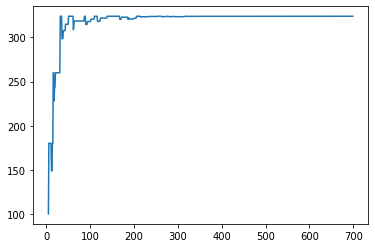

In [35]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_matrix = enviro_people - enviro_cars

# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to
# the path selected and the Q learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'p' in environment:
        enviro_matrix[current_state, action] += 1
    if 'c' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))


plt.plot(scores)
plt.show()